# Cats VS Dogs 

Pour cet exercice de Deep Learning, nous allons créer un réseau de neurones simple qui va reconnaitre des chiens et des chats dans un dataset ! 

* Installez Tensorflow 2.0 et importez les librairies : 
  * Tensorflow 
  * Numpy 
  * Pandas 
  * Matplotlib.pyplot

In [1]:
!pip install tensorflow==2.0

In [2]:
import tensorflow as tf

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

#* En utilisant [`tf.keras.utils.get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) importez le dataset `cats&dogs` via cet url : 

`https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip`

In [6]:
zip_file = tf.keras.utils.get_file("catsNdogs.zip", 
                                   "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                                   cache_subdir="/Users/tashi/Documents/GitHub/jedha/content", 
                                   extract=True)

#import os
#os.listdir("/content/cats_and_dogs_filtered/train")

68608000/68606236 [==============================] - 39s 1us/step


* Grâce à la librairie [pathlib](https://docs.python.org/3/library/pathlib.html), stockez dans une variable, le chemin vers votre dossier de train 

In [7]:
import pathlib
train_set = pathlib.Path("/Users/tashi/Documents/GitHub/jedha/content/cats_and_dogs_filtered/train")

# train_set contient le path vers les données d'entraînement
print(train_set)
print(type(train_set))

\Users\tashi\Documents\GitHub\jedha\content\cats_and_dogs_filtered\train
<class 'pathlib.WindowsPath'>


* Vous avez maintenant accès à tous les dossiers et fichiers contenus dans _train_. Cependant, pour pouvoir lire les fichiers d'images avec Tensorflow, nous avons besoin de convertir chacun des chemins en _string_ et non _posixpath_. Utilisez une [_list comprehension_](https://medium.com/better-programming/list-comprehension-in-python-8895a785550b) pour pouvoir stocker dans une liste, chacun des chemins vers les images de chats et chiens. 

In [10]:
all_image_paths = [str(img_path) for img_path in list(train_set.glob("*/*")) if ".jpg" in str(img_path)]
all_image_paths[:5]

#cats = ["/content/cats_and_dogs_filtered/train/cats/" + img for img in os.listdir("/content/cats_and_dogs_filtered/train/cats")]
#dogs = ["/content/cats_and_dogs_filtered/train/dogs/" + img for img in os.listdir("/content/cats_and_dogs_filtered/train/dogs")]
#images = cats + dogs
#images

# voir os.walk() également

['\\Users\\tashi\\Documents\\GitHub\\jedha\\content\\cats_and_dogs_filtered\\train\\cats\\cat.0.jpg',
 '\\Users\\tashi\\Documents\\GitHub\\jedha\\content\\cats_and_dogs_filtered\\train\\cats\\cat.1.jpg',
 '\\Users\\tashi\\Documents\\GitHub\\jedha\\content\\cats_and_dogs_filtered\\train\\cats\\cat.10.jpg',
 '\\Users\\tashi\\Documents\\GitHub\\jedha\\content\\cats_and_dogs_filtered\\train\\cats\\cat.100.jpg',
 '\\Users\\tashi\\Documents\\GitHub\\jedha\\content\\cats_and_dogs_filtered\\train\\cats\\cat.101.jpg']


* Vous allez avoir besoin de convertir chacun des chemins en [_bytes_](https://en.wikipedia.org/wiki/Byte). Pour cela, utilisez une nouvelle _list comprehension_ qui va cette fois appliquer la méthode [`tf.io.read_file()`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) sur chacun des chemins

In [11]:
# Convert all string path into bytes
all_image_bytes = [tf.io.read_file(path) for path in all_image_paths]

In [14]:
all_image_bytes[1]

<tf.Tensor: id=3, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\x18\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\x

* Maintenant qu'on a des _bytes_, nous allons pouvoir les convertir en tenseurs. Utilisez à nouveau une _list comprehension_ dans laquelle vous allez appliquer la méthode [`tf.image.decode_jpeg`](https://www.tensorflow.org/s/results/?q=tf.image.decode_jpeg) sur chacun des éléments de votre liste.

In [15]:
# Convert all bytes into a tensor
all_image_tensors = [tf.image.decode_jpeg(img_byte) for img_byte in all_image_bytes]

In [24]:
len(all_image_tensors)

2000

* Voyons si tout fonctionne bien, tentez de visualiser une image via [`plt.imshow()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In [32]:
all_image_tensors[0].shape

TensorShape([374, 500, 3])

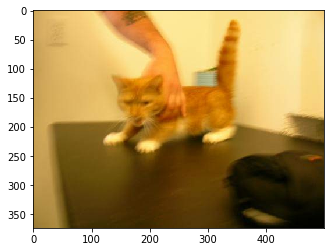

In [30]:
# Visualize an image
import matplotlib.pyplot as plt
plt.imshow(all_image_tensors[0])

* Nous allons cette fois mettre tous les tenseurs dans un [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) pour pouvoir manipuler les données et les insérer plus facilement dans un réseau de neurones. Créez donc un `tf.data.Dataset` dans lequel vous mettrez tous les tenseurs d'images que vous avez créer plus haut. 

In [62]:
# Création d'un train set avec uniquement les images d'entrainement
tf_train_set = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [34]:
tf_train_set

<TensorSliceDataset shapes: (), types: tf.string>

* Passons au preprocessing des images et à de la Data Augmentation. Créez une fonction *load_and_preprocess_images* qui prendra un argument _img_ qui sera un chemin vers une image. A l'intérieur de la fonction, _img_ va passer par le preprocessing suivant : 
  * [tf.io.read_file ](https://www.tensorflow.org/api_docs/python/tf/io/read_file)--> Converti le chemin bytes
  * [tf.image.decode_jpeg](https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg) ---> Converti les bytes en tenseurs 
  * [tf.image.resize](https://www.tensorflow.org/api_docs/python/tf/image/resize_images) ---> Ajuste la taille de toutes les images. On mettra du (192, 192)
  * [tf.image.random_flip_left_right ](https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right)---> Applique un effet mirroir sur les images 
  * [tf.image.random_contrast](https://www.tensorflow.org/api_docs/python/tf/image/random_contrast) ---> Applique des effets de contraste aux images 
  * Enfin divisez votre _img_ par 255

In [35]:
# Preprocess the images and data augmentation 
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  
  return img

* En utilisant la méthode[ `.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map), appliquez votre fonction *load_and_preprocess_images* sur tout votre dataset

In [63]:
# Apply function to the dataset
tf_train_set = tf_train_set.map(load_and_preprocess_images)

* Tentons de voir un exemple de notre dataset pour être sur que tout se soit bien passé. En utilisant, [`tf.take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take), créez une boucle pour voir une image sous  forme de tenseur. 

(192, 192, 3)


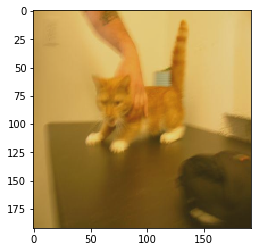

In [67]:
# Get an example tensor
for example_tensor in tf_train_set.take(1):
  #print(example_tensor)
  print(example_tensor.shape)
  plt.imshow(example_tensor)

* Nous allons maintenant nous occuper d'associer un label à chaque tenseur. Pour cela, nous allons passer par plusieurs étapes. 
  * Créez tout d'abord une liste _labels_ qui contiendra le nom des labels `['cats', 'dogs']`. Pour arriver à cela, vous pouvez utiliser 
    * [`path.name`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.name)
    * [`path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir)

In [53]:
train_set
#os.listdir("/content/cats_and_dogs_filtered/train")

WindowsPath('/Users/tashi/Documents/GitHub/jedha/content/cats_and_dogs_filtered/train')

In [54]:
labels = []

# On parcourt tous les dossiers dans le dossier train et on stocke le nom des dossiers
# qu'il contient, ces dossiers correspondent aux labels, cat ou dog
for a in train_set.iterdir():
  labels += [a.name]

labels

['cats', 'dogs']

* Nous aurons besoin d'un numéro d'index pour chacun de ces deux labels. Pour cela, nous pouvons faire quelque chose d'assez générique. Nous allons créer un dictionnaire ayant pour clé le nom du label et pour valeur le numéro d'index. 
  * Vous pouvez vous aider de [`enumerate()`](http://book.pythontips.com/en/latest/enumerate.html) pour arriver à vos fins. 

In [55]:
label_index = {}

# On parcourt tous les labels et on leur assigne une valeur d'index
for i, label in enumerate(labels):
  label_index[label]= i

label_index

#label_index = {"cats": 0, "dogs": 1}


{'cats': 0, 'dogs': 1}

* Nous avons maintenant à créer une liste d'une longueur égale à votre nombre total d'images contenant tous les labels de chacune des images. Pour arriver cela, créez une _list comprehension_ qui va boucler toutes _posixpath_ d'images et retirez le dossier parent de chacune des images via [`path.parent`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent). 

In [59]:
# Ici 
# 1. on parcourt toutes les images du dossier train (on les récupére via train_set.glob("*/*"))
# 2. Pour chaque image on récupère le nom de son dossier parent (ce sera cat ou dog en fonction de l'image)
# 3. A la fin on obtient un vecteur avec tous les labels et ce dans le même ordre que les images que l'on a loadé auparavent
all_image_path = [path for path in list(train_set.glob("*/*")) if ".jpg" in str(path)]

all_image_parent_folder = [path.parent.name for path in all_image_path]

all_image_labels = [label_index[parent_folder] for parent_folder in all_image_parent_folder]

print(all_image_labels[-5:])

type(all_image_labels)

[1, 1, 1, 1, 1]


list

* Enfin, insérez ces labels dans un `tf.data.Dataset`

In [60]:
# Create a tf.data.Dataset of labels 
tf_labels = tf.data.Dataset.from_tensor_slices(all_image_labels)
for example in tf_labels.take(1):
  print(example)

tf.Tensor(0, shape=(), dtype=int32)


* Nous avons plus qu'à fusionner les deux `tf.data.Dataset` contenant les images et les labels pour avoir un dataset complet. 
  * Pour cela, aidez vous de [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)

In [65]:
# Create a full dataset 
# Soient a et b 2 listes de même taille
# zip associe 2 à 2 les éléments de a et b placés aux mêmes index => a[i] sera associé à b[i]
full_ds = tf.data.Dataset.zip((tf_train_set, tf_labels))

for example in full_ds.take(1):
  print(example)

(<tf.Tensor: id=8242, shape=(192, 192, 3), dtype=float32, numpy=
array([[[0.7966579 , 0.6504599 , 0.35546887],
        [0.80264866, 0.65483373, 0.356609  ],
        [0.8070225 , 0.65684444, 0.35389346],
        ...,
        [0.73737246, 0.58918446, 0.30215344],
        [0.7310086 , 0.5828206 , 0.2957896 ],
        [0.72501785, 0.5768298 , 0.28979886]],

       [[0.79749745, 0.6512994 , 0.3563084 ],
        [0.80395555, 0.65579957, 0.35859802],
        [0.8050325 , 0.6588344 , 0.35588345],
        ...,
        [0.73737246, 0.58918446, 0.30215344],
        [0.7310086 , 0.5828206 , 0.2957896 ],
        [0.72501785, 0.5768298 , 0.28979886]],

       [[0.79938376, 0.6531857 , 0.35819474],
        [0.8042671 , 0.6580691 , 0.36146125],
        [0.8070225 , 0.6608245 , 0.36185345],
        ...,
        [0.73737246, 0.58918446, 0.30215344],
        [0.7310086 , 0.5828206 , 0.2957896 ],
        [0.72501785, 0.5768298 , 0.28979886]],

       ...,

       [[0.32542142, 0.25683343, 0.11706256],
   

In [ ]:
for e in full_ds.take(1):
  print(e)
#img_numpy = e[0].numpy()

(<tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
array([[[0.49128222, 0.4177324 , 0.3613202 ],
        [0.49128222, 0.4177324 , 0.3613202 ],
        [0.49128222, 0.4177324 , 0.3613202 ],
        ...,
        [0.5923695 , 0.5694015 , 0.50287294],
        [0.580172  , 0.5487316 , 0.48947415],
        [0.59191084, 0.55478   , 0.49634454]],

       [[0.5022522 , 0.42870235, 0.37229016],
        [0.5022522 , 0.42870235, 0.37229016],
        [0.5022522 , 0.42870235, 0.37229016],
        ...,
        [0.5667209 , 0.53768307, 0.47722432],
        [0.54698163, 0.5172493 , 0.45438793],
        [0.6424141 , 0.611522  , 0.5470167 ]],

       [[0.5045916 , 0.43104178, 0.37462956],
        [0.5045916 , 0.43104178, 0.37462956],
        [0.5045916 , 0.43104178, 0.37462956],
        ...,
        [0.56428605, 0.5312018 , 0.47276625],
        [0.5642621 , 0.536557  , 0.4732514 ],
        [0.56059086, 0.53657806, 0.46702564]],

       ...,

       [[0.5719179 , 0.55660015, 0.50775427],
        [0.5

* Maintenant, nous avons besoin d'effectuer un shuffle de notre dataset et de créer des batch d'images. Effectuez ceci en utilisant : 
  * [`tf.data.Dataset.shuffle`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)
  * [`tf.data.Dataset.batch`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)
  
  Attention l'ordre compte ;) 

In [68]:
# Shuffle the dataset & create batchs 
full_ds = full_ds.shuffle(len(all_image_paths)).batch(16)

* Prenez maintenant une dizaine de batch et visualisez les images de chaque batch. Pour cela, vous pouvez vous aider de : 

  * [`plt.figure()`](https://matplotlib.org/3.1.0/api/figure_api.html?highlight=figure#module-matplotlib.figure)
  * [`plt.imshow()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow)
  * [`plt.show()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.show.html)
  * [`dataset.take()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take)

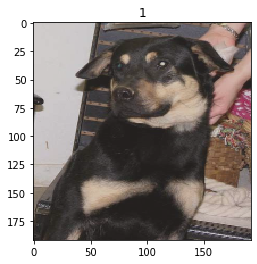

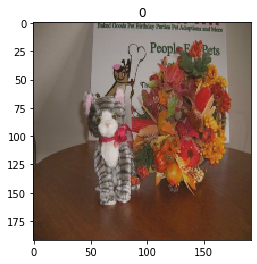

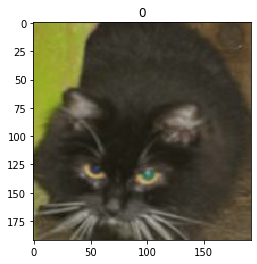

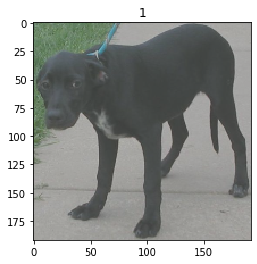

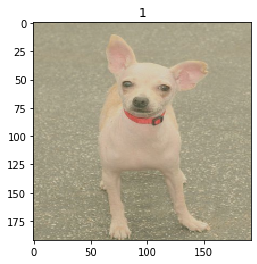

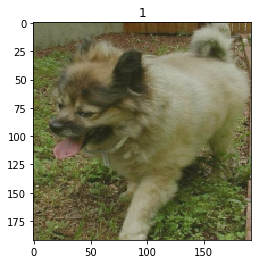

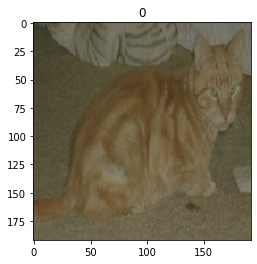

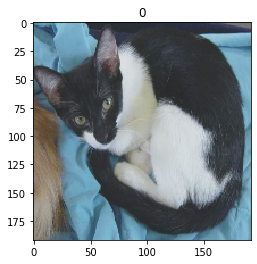

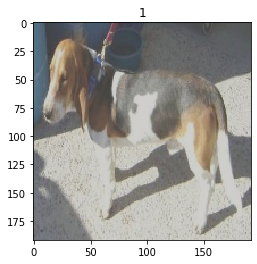

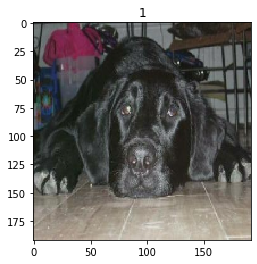

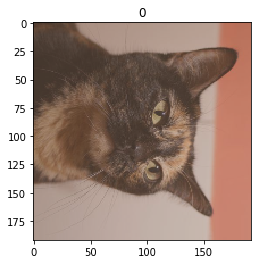

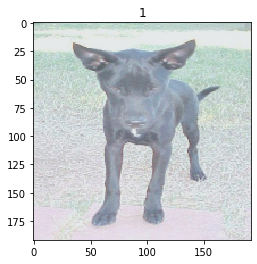

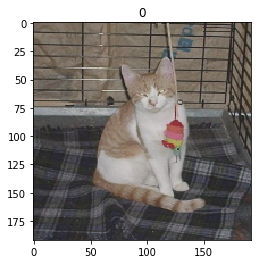

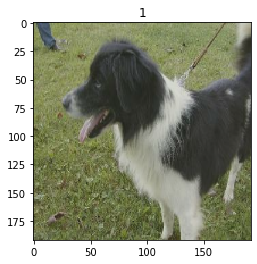

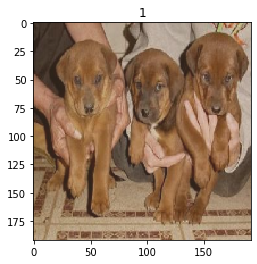

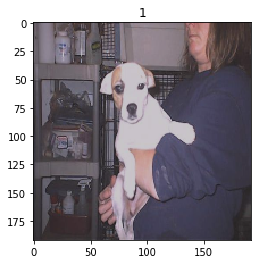

In [69]:
# Visualize some data 
for example_x, example_y in full_ds.take(1):
  for i in range(len(example_y)):
    plt.figure()
    plt.title(example_y.numpy()[i])
    plt.imshow(example_x.numpy()[i])
    plt.show()

* Passons maintenant à la création d'un modèle ! Vous allez devoir construire un réseau de neurones classique pour classer chacune des images en chien ou en chat. 
  * En utilisant [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) & [`tf.keras.layers`](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
  
  * Attention, vous aurez besoin d'utiliser [`tf.keras.layers.Flatten()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) en entrée de votre réseau de neurones. 
  * Nous vous conseillons aussi de regarder [`tf.keras.layers.Dropout()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) qui sont des couches qui vous permettent d'éviter l'overfitting. 

In [70]:
# Création d'un model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(), # Cette couche permet de "flatten" l'entrée, Les images de taille (192, 192, 3) sont changées en vecteur de taille 192*192*3 
        o0.
])

* Mettons en place un `learning_rate` schedule. Ceci va nous permettre de faire baisser le *learning_rate* à mesure que vous entrainez votre modèle. 
  * Tentez d'implémenter un [ExponentialDecay](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 
  * Vous démarrerez avec un `learning_rate` à 1e-4

In [71]:
# Création d'un schedule learning rate 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

* On va maintenant instancier [ `model.compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). 
  * Prenez un optimizer Adam
  * Votre loss sera : `binary crossentropy`
  * Votre metric sera : `binary accuracy`

In [72]:
# Création d'un compileur
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
              loss= tf.keras.losses.binary_crossentropy,
              metrics = [tf.keras.metrics.binary_accuracy])

* Entrainez votre modèle sur 200 epochs. 
   * ATTENTION : N'oubliez pas de mettre votre Colab en GPU sinon vous allez attendre longtemps ;) 

In [73]:
model.fit(full_ds, epochs=60)

Epoch 1/60
125/125 [==============================] - 28s 226ms/step - loss: 0.7409 - binary_accuracy: 0.5090
Epoch 2/60
125/125 [==============================] - 25s 200ms/step - loss: 0.7127 - binary_accuracy: 0.5025
Epoch 3/60
125/125 [==============================] - 28s 222ms/step - loss: 0.7075 - binary_accuracy: 0.4950
Epoch 4/60
125/125 [==============================] - 25s 201ms/step - loss: 0.6989 - binary_accuracy: 0.4960
Epoch 5/60
125/125 [==============================] - 27s 218ms/step - loss: 0.7032 - binary_accuracy: 0.4995
Epoch 6/60
125/125 [==============================] - 25s 204ms/step - loss: 0.7003 - binary_accuracy: 0.4975
Epoch 7/60
125/125 [==============================] - 25s 201ms/step - loss: 0.6988 - binary_accuracy: 0.4985
Epoch 8/60
125/125 [==============================] - 25s 201ms/step - loss: 0.6975 - binary_accuracy: 0.5130
Epoch 9/60
125/125 [==============================] - 25s 203ms/step - loss: 0.7011 - binary_accuracy: 0.4950
Epoch 10/6

* Il a fallu faire beaucoup d'epochs mais les résultats ont l'air satisfaisants ! Il faudrait qu'on les teste sur nos données de validation. Passez par le même processus de préparation de données que vous avez utilisé pour vos données de test. 

In [79]:
# Préparation des données validation
## Path
valid_set = pathlib.Path("/Users/tashi/Documents/GitHub/jedha/content/cats_and_dogs_filtered/validation")

In [80]:
# Create string paths for each image
all_val_image_paths = [str(path) for path in list(valid_set.glob("*/*"))]

In [81]:
# Create a valid tf.data.Dataset
tf_valid_set = tf.data.Dataset.from_tensor_slices(all_val_image_paths)

In [82]:
# Preprocess the images and data augmentation 
def load_valid_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [192, 192])
  img = img / 255.0
  
  return img



In [83]:
# Create labels 
labels = []
for label in valid_set.iterdir():
  labels += [label.name]
  
# Create labels for each image
all_image_labels = [label_index[path.parent.name] for path in list(valid_set.glob("*/*"))]

# Load into a tf.data.Dataset
tf_valid_labels_set = tf.data.Dataset.from_tensor_slices(all_image_labels)

In [84]:
# Create a full dataset 
full_valid_ds = tf.data.Dataset.zip((tf_valid_set, tf_valid_labels_set))
full_valid_ds = full_valid_ds.shuffle(len(all_val_image_paths)).batch(16)

* En utilisant [`model.evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate), tentez de regarder le score que vous avez. Qu'est ce que vous pouvez conclure ?

In [86]:
model.evaluate(full_valid_ds)
print(
"Notre score sur le train est plus élevé que notre score sur le test.Il semblerait que nous ayons overfitté"
)

 1/63 [..............................] - ETA: 2s

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 110592 but received input with shape [None, 1]

* Tentez de regarder les probabilités des prédictions d'un batch de données. Associez la probabilité à l'image correspondante. 
  * Pour cela, aidez vous de [`model.predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

In [87]:
for example, label in full_valid_ds.take(1):
  y_pred = model.predict(example.numpy())
  
  for i in range(len(y_pred)):
    plt.figure()
    plt.title(y_pred[i])
    plt.imshow(example[i])

plt.show()

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 110592 but received input with shape [None, 1]

* Nous aimerions savoir quelles sont les prédictions sur lesquelles le modèle s'est le plus trompé. Pour cela, nous allons définir une fonction *most_confused* qui bouclera sur tous les batchs de notre dataset de validation et sortira les MAE la plus élevée entre la prédiction et la valeur réelle. 
  * Pour rappel, la MAE (Mean Absolute Error) : `np.abs(y_pred - y_true)`

In [88]:
def most_confused(full_valid_ds, threshold):
  for example, labels in full_valid_ds.take(-1):
    y_pred = model.predict(example)
    mae = np.abs(y_pred.squeeze() - labels.numpy().squeeze())

    for i in np.where(mae>threshold)[0]:
      plt.figure()
      plt.title("prediction: {}\n MAE : {}".format(y_pred[i], mae[i]))
      plt.imshow(example[i])

  plt.show()
  
# Ici on affiche les images sur lesquelles on s'est le plus trompés.
most_confused(full_valid_ds, 0.8)

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 110592 but received input with shape [None, 1]

* Enfin, nous aimerions créer une matrice de confusion pour voir où le modèle s'est trompé. Cela va se passer en trois étapes : 
  * Créez deux listes vides : `y_true` & `y_pred`
  * Bouclez sur tout votre dataset de validation et ajoutez les prédictions de chaque batch dans `y_pred` et les valeurs réelles dans `y_true`
  * Concaténez via [`tf.concat()`](https://www.tensorflow.org/api_docs/python/tf/concat) chaque item de `y_pred` et `y_true` pour avoir deux listes `y_pred`et `y_true` de longueur 1000. 
  * Insérez `y_pred` et `y_true` dans une matrice de confusion de sklearn. 

In [ ]:
y_true = []
y_pred = []
for batch, true_labels in full_valid_ds.take(-1):
  y_true += [true_labels.numpy()]
  y_pred += [model.predict_classes(batch)]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_true = tf.concat([batch for batch in y_true], axis=0).numpy()
y_pred = tf.concat([batch for batch in y_pred], axis=0).numpy()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


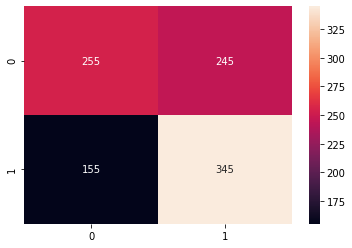

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

---> On retrouve bien 62.5% d'accuracy que nous avait montré `model.evaluate`

In [ ]:
full_valid_ds.take(-1)

<TakeDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>